https://github.com/aristospl/rock-scissor-paper

In [8]:
#import libraries
import cv2
import os
import numpy as np

# main directory containing three subfolders: rock, scissors, and paper
main_directory = '/content/drive/MyDrive/Colab Notebooks/dataset'

# initialize three lists to store images
images_rock = []
images_scissors = []
images_paper = []

# iterate over each folder in the main directory
for folder in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder)

    # check if the item in the directory is a folder
    if os.path.isdir(folder_path):

        # initialize a list to store images in the current folder
        current_folder_images = []

        # iterate over each file in the folder
        for filename in os.listdir(folder_path):
            if filename.lower().endswith('.png'):
                # construct the full path to the image
                image_path = os.path.join(folder_path, filename)

                # read the image and append it to the current folder's list
                image = cv2.imread(image_path)
                current_folder_images.append(image)

        # append the current folder's list to the appropriate images list
        if folder == 'rock':
            images_rock.extend(current_folder_images)
        elif folder == 'scissors':  # Updated folder name
            images_scissors.extend(current_folder_images)
        elif folder == 'paper':
            images_paper.extend(current_folder_images)

# convert lists to numpy arrays
images_rock = np.array(images_rock)
images_scissors = np.array(images_scissors)
images_paper = np.array(images_paper)

# print the shape of each array
print("Shape of images_rock:", images_rock.shape)
print("Shape of images_scissors:", images_scissors.shape)
print("Shape of images_paper:", images_paper.shape)

Shape of images_rock: (726, 200, 300, 3)
Shape of images_scissors: (750, 200, 300, 3)
Shape of images_paper: (712, 200, 300, 3)


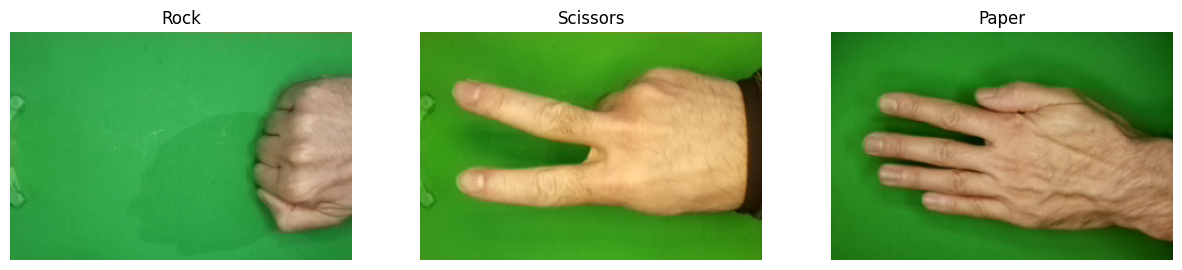

In [10]:
#import library
import matplotlib.pyplot as plt

# display the first image from each category
plt.figure(figsize = (15, 5))

# first subplot
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(images_rock[0], cv2.COLOR_BGR2RGB))
plt.title('Rock')
plt.axis('off')

# second subplot
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(images_scissors[0], cv2.COLOR_BGR2RGB))
plt.title('Scissors')
plt.axis('off')

# third subplot
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(images_paper[0], cv2.COLOR_BGR2RGB))
plt.title('Paper')
plt.axis('off')

# plot
plt.show()

In [11]:
# concatenate all the images
all_images = np.concatenate([images_rock, images_scissors, images_paper], axis=0)

# create labels for each category
labels_rock = np.zeros(images_rock.shape[0])
labels_scissors = np.ones(images_scissors.shape[0])
labels_paper = 2 * np.ones(images_paper.shape[0])

# concatenate labels
all_labels = np.concatenate([labels_rock, labels_scissors, labels_paper])

# print the shapes of arrays
print("all_images shape:", all_images.shape)
print("all_labels shape:", all_labels.shape)

all_images shape: (2188, 200, 300, 3)
all_labels shape: (2188,)


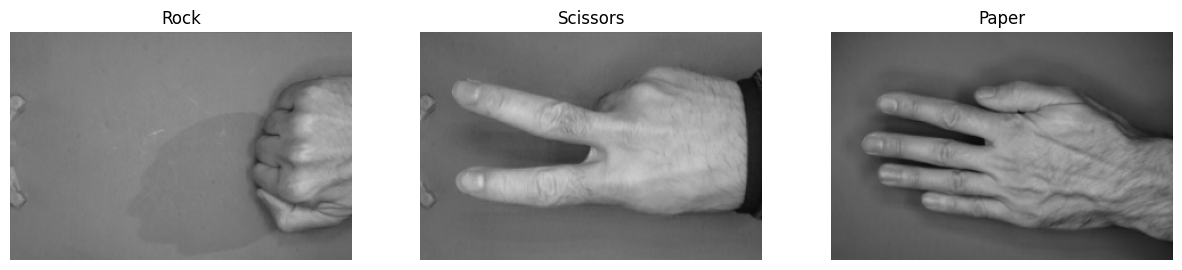

In [12]:
# iterate over each RGB image and convert it to grayscale
all_images = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in all_images])

# display the first image from each category
plt.figure(figsize = (15, 5))

# first subplot
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(all_images[0], cv2.COLOR_BGR2RGB))
plt.title('Rock')
plt.axis('off')

# second subplot
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(all_images[len(images_rock)], cv2.COLOR_BGR2RGB))
plt.title('Scissors')
plt.axis('off')

# third subplot
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(all_images[len(images_rock) + len(images_scissors)], cv2.COLOR_BGR2RGB))
plt.title('Paper')
plt.axis('off')

# plot
plt.show()

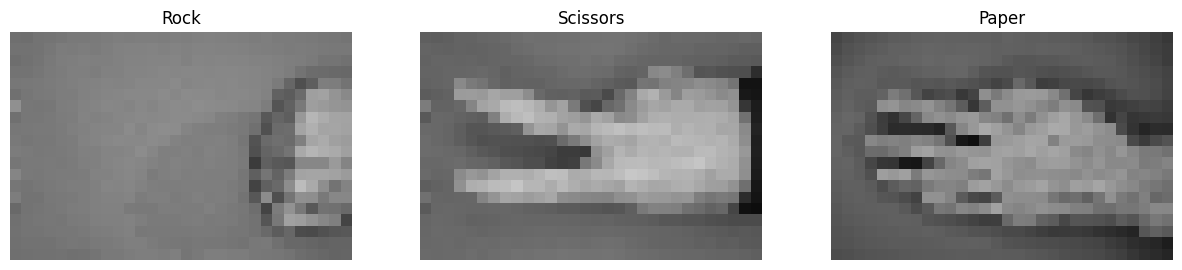

In [13]:
# iterate over each image and resize it to 20x30
all_images = np.array([cv2.resize(img, (30, 20)) for img in all_images])

# display the first image from each category
plt.figure(figsize = (15, 5))

# first subplot
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(all_images[0], cv2.COLOR_BGR2RGB))
plt.title('Rock')
plt.axis('off')

# second subplot
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(all_images[len(images_rock)], cv2.COLOR_BGR2RGB))
plt.title('Scissors')
plt.axis('off')

# third subplot
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(all_images[len(images_rock) + len(images_scissors)], cv2.COLOR_BGR2RGB))
plt.title('Paper')
plt.axis('off')

# plot
plt.show()

In [14]:
# import library
from sklearn.model_selection import train_test_split

# train-test split with stratify the split based on labels
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size = 0.2, random_state = 0, stratify = all_labels)

# print the shapes of arrays
print("Train set shape:", train_images.shape, ', train labels shape:', train_labels.shape)
print("Test set shape:", test_images.shape, ', test labels shape:', test_labels.shape)

Train set shape: (1750, 20, 30) , train labels shape: (1750,)
Test set shape: (438, 20, 30) , test labels shape: (438,)


In [15]:
# print unique label and its count for check
unique_test_labels, counts = np.unique(test_labels, return_counts=True)
for label, count in zip(unique_test_labels, counts):
    print(f"Label {int(label)}: Count {count}")

Label 0: Count 145
Label 1: Count 150
Label 2: Count 143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


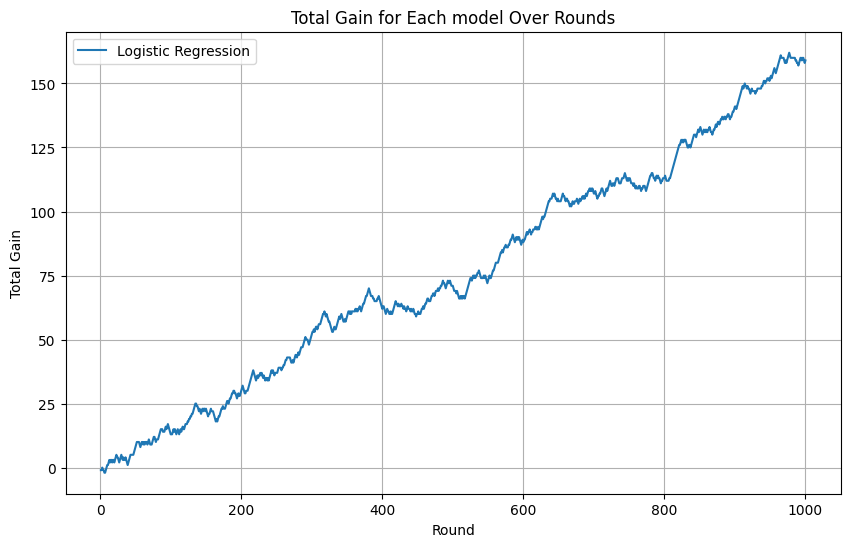

Total Gain for Logistic Regression: 159
Total Training Time for Logistic Regression: 0.4995 seconds



For Logistic Regression:
----------------------------------------
  True label 0: 321 times

  Agent move 0: 65 times
  Agent move 1: 123 times
  Agent move 2: 133 times
----------------------------------------
  True label 1: 345 times

  Agent move 0: 156 times
  Agent move 1: 94 times
  Agent move 2: 95 times
----------------------------------------
  True label 2: 334 times

  Agent move 0: 74 times
  Agent move 1: 162 times
  Agent move 2: 98 times


In [16]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time

# reshape training set
train_images = train_images.reshape(-1, np.prod(train_images[0].shape))

# normalization
scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)

# initialize models
models = {
    'Logistic Regression': LogisticRegression(),
#    'Random Forest': RandomForestClassifier(),
#    'SVM': SVC(),
#    'KNN': KNeighborsClassifier(),
#    'Neural Network': MLPClassifier(),
}

# initialize a dictionary to store total gain for each model
model_total_gain = {model_name: 0 for model_name in models}

# initialize a dictionary to store total gain for each model after each round
model_total_gain_per_round = {model_name: [] for model_name in models}

# initialize a dictionary to store training time for each model
model_training_time = {}

# train models once on the entire training set and measure training time
for model_name, model in models.items():
    start_time = time.time()
    model.fit(train_images, train_labels)
    end_time = time.time()
    training_time = end_time - start_time
    model_training_time[model_name] = training_time

# number of rounds
N = 1000

# initialize dictionaries to count occurrences of random labels and agent moves for each model
random_label_counts = {0: 0, 1: 0, 2: 0}
agent_move_counts = {model_name: {0: {0: 0, 1: 0, 2: 0}, 1: {0: 0, 1: 0, 2: 0}, 2: {0: 0, 1: 0, 2: 0}} for model_name in models}

for round in range(N):
    # random index from the testing set
    random_index = np.random.choice(test_images.shape[0])

    # random image and its label
    random_image = test_images[random_index]
    true_label = test_labels[random_index]

    # apply vertical flip with probability p_1 = 0.5
    if np.random.rand() < 0.5:
        random_image = cv2.flip(random_image, 1)

    # apply horizontal flip with probability p_2 = 0.5
    if np.random.rand() < 0.5:
        random_image = cv2.flip(random_image, 0)

    # add white noise to the image with m = 0 and std = 5%
    noise = np.random.normal(loc = 0, scale = 0.05 * 255, size = random_image.shape).astype(np.uint8)
    noisy_image = cv2.add(random_image, noise)

    # flatten the image
    flattened_image = random_image.flatten()

    # scale the image
    flattened_image = scaler.transform(flattened_image.reshape(1, -1))

    # predict with each model
    predictions = {}
    for model_name, model in models.items():
        predictions[model_name] = model.predict(flattened_image.reshape(1, -1))

    # count occurrences of random labels
    random_label_counts[true_label] += 1

    # agent chooses a move
    for model_name in models.keys():
        agent_move = (predictions[model_name] + 2) % 3

        # Count occurrences of agent moves for each model
        agent_move_counts[model_name][true_label][int(agent_move[0])] += 1

        # calculate gain based on the game rules
        if (true_label + 2) % 3 == agent_move:
            model_total_gain[model_name] += 1
        elif true_label == agent_move:
            model_total_gain[model_name] += 0
        else:
            model_total_gain[model_name] -= 1

        # save the total gain for each model after each round
        model_total_gain_per_round[model_name].append(model_total_gain[model_name])

# plot the total gain for each model over the rounds
plt.figure(figsize = (10, 6))
for model_name, gains_per_round in model_total_gain_per_round.items():
    plt.plot(range(1, N + 1), gains_per_round, label=model_name)

plt.xlabel('Round')
plt.ylabel('Total Gain')
plt.legend()
plt.title('Total Gain for Each model Over Rounds')
plt.grid()
plt.show()

# print the total gain for each model after N rounds
for model_name, gain in model_total_gain.items():
    print("=" * 40)
    print(f"Total Gain for {model_name}: {gain}")
    print(f"Total Training Time for {model_name}: {model_training_time[model_name]:.4f} seconds")

# print the occurrences of random labels and agent moves for each model
print("\n\n")
for model_name, counts_per_label in agent_move_counts.items():
    print("=" * 40)
    print(f"For {model_name}:")
    for label, counts in counts_per_label.items():
        print("-" * 40)
        print(f"  True label {label}: {random_label_counts[label]} times")
        print('')
        for action, count in counts.items():
            print(f"  Agent move {action}: {count} times")

Shape of images_rock: (5, 200, 300, 3)
Shape of images_scissors: (5, 200, 300, 3)
Shape of images_paper: (5, 200, 300, 3)


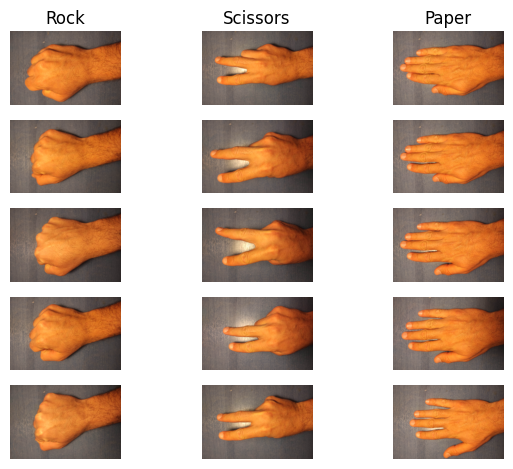

In [17]:
# main directory containing three subfolders: rock, scissors, and paper
main_directory = '/content/drive/MyDrive/Colab Notebooks/my hand'

# initialize three lists to store images
images_rock = []
images_scissors = []
images_paper = []

# iterate over each folder in the main directory
for folder in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder)

    # check if the item in the directory is a folder
    if os.path.isdir(folder_path):

        # initialize a list to store images in the current folder
        current_folder_images = []

        # iterate over each file in the folder
        for filename in os.listdir(folder_path):
            if filename.lower().endswith('.png'):
                # construct the full path to the image
                image_path = os.path.join(folder_path, filename)

                # read the image and append it to the current folder's list
                image = cv2.imread(image_path)
                current_folder_images.append(image)

        # append the current folder's list to the appropriate images list
        if folder == 'rock':
            images_rock.extend(current_folder_images)
        elif folder == 'scissors':  # Updated folder name
            images_scissors.extend(current_folder_images)
        elif folder == 'paper':
            images_paper.extend(current_folder_images)

# convert lists to numpy arrays
images_rock = np.array(images_rock)
images_scissors = np.array(images_scissors)
images_paper = np.array(images_paper)

# print the shape of each array
print("Shape of images_rock:", images_rock.shape)
print("Shape of images_scissors:", images_scissors.shape)
print("Shape of images_paper:", images_paper.shape)


# display all images from each category
for i in range(len(images_rock)):
    # sublot for rocks
    plt.subplot(len(images_rock), 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(images_rock[i], cv2.COLOR_BGR2RGB))
    if i == 0:
      plt.title('Rock')
    plt.axis('off')

    # sublot for scissors
    plt.subplot(len(images_scissors), 3, i * 3 + 2)
    plt.imshow(cv2.cvtColor(images_scissors[i], cv2.COLOR_BGR2RGB))
    if i == 0:
      plt.title('Scissors')
    plt.axis('off')

    # sublot for papers
    plt.subplot(len(images_paper), 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(images_paper[i], cv2.COLOR_BGR2RGB))
    if i == 0:
      plt.title('Paper')
    plt.axis('off')

# plot
plt.tight_layout()
plt.show()


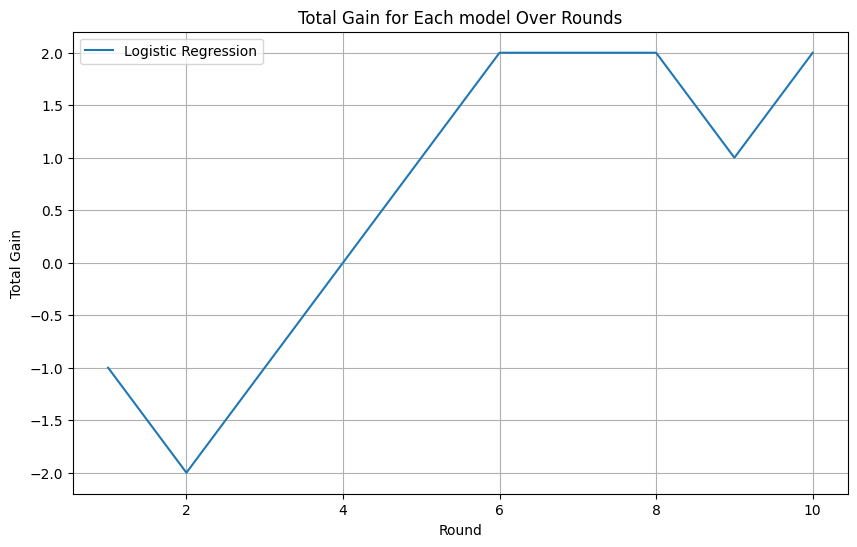

Total Gain for Logistic Regression: 2



For Logistic Regression:
----------------------------------------
  True label 0: 6 times

  Agent move 0: 0 times
  Agent move 1: 3 times
  Agent move 2: 3 times
----------------------------------------
  True label 1: 2 times

  Agent move 0: 0 times
  Agent move 1: 2 times
  Agent move 2: 0 times
----------------------------------------
  True label 2: 2 times

  Agent move 0: 0 times
  Agent move 1: 2 times
  Agent move 2: 0 times


In [22]:
# concatenate all the images
all_images = np.concatenate([images_rock, images_scissors, images_paper], axis = 0)

# create labels for each category
labels_rock = np.zeros(images_rock.shape[0])
labels_scissors = np.ones(images_scissors.shape[0])
labels_paper = 2 * np.ones(images_paper.shape[0])

# concatenate labels
all_labels = np.concatenate([labels_rock, labels_scissors, labels_paper])

# iterate over each RGB image and convert it to grayscale
all_images = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in all_images])

# iterate over each image and resize it to 20x30
all_images = np.array([cv2.resize(img, (30, 20)) for img in all_images])

# set all_images as test images
test_images = all_images

# initialize a dictionary to store total gain for each model
model_total_gain = {model_name: 0 for model_name in models}

# initialize a dictionary to store total gain for each model after each round
model_total_gain_per_round = {model_name: [] for model_name in models}

# initialize a dictionary to store training time for each model
model_training_time = {}

# number of rounds
N = 10

# initialize dictionaries to count occurrences of random labels and agent moves for each model
random_label_counts = {0: 0, 1: 0, 2: 0}
agent_move_counts = {model_name: {0: {0: 0, 1: 0, 2: 0}, 1: {0: 0, 1: 0, 2: 0}, 2: {0: 0, 1: 0, 2: 0}} for model_name in models}

for round in range(N):
    # random index from the testing set
    random_index = np.random.choice(test_images.shape[0])

    # random image and its label
    random_image = test_images[random_index]
    true_label = test_labels[random_index]

    # apply vertical flip with probability p_1 = 0.5
    if np.random.rand() < 0.5:
        random_image = cv2.flip(random_image, 1)

    # apply horizontal flip with probability p_2 = 0.5
    if np.random.rand() < 0.5:
        random_image = cv2.flip(random_image, 0)

    # add white noise to the image with m = 0 and std = 5%
    noise = np.random.normal(loc = 0, scale = 0.05 * 255, size = random_image.shape).astype(np.uint8)
    noisy_image = cv2.add(random_image, noise)

    # flatten the image
    flattened_image = random_image.flatten()

    # scale the image
    flattened_image = scaler.transform(flattened_image.reshape(1, -1))

    # predict with each model
    predictions = {}
    for model_name, model in models.items():
        predictions[model_name] = model.predict(flattened_image.reshape(1, -1))

    # count occurrences of random labels
    random_label_counts[true_label] += 1

    # agent chooses a move
    for model_name in models.keys():
        agent_move = (predictions[model_name] + 2) % 3

        # Count occurrences of agent moves for each model
        agent_move_counts[model_name][true_label][int(agent_move[0])] += 1

        # calculate gain based on the game rules
        if (true_label + 2) % 3 == agent_move:
            model_total_gain[model_name] += 1
        elif true_label == agent_move:
            model_total_gain[model_name] += 0
        else:
            model_total_gain[model_name] -= 1

        # save the total gain for each model after each round
        model_total_gain_per_round[model_name].append(model_total_gain[model_name])

# plot the total gain for each model over the rounds
plt.figure(figsize = (10, 6))
for model_name, gains_per_round in model_total_gain_per_round.items():
    plt.plot(range(1, N + 1), gains_per_round, label=model_name)

plt.xlabel('Round')
plt.ylabel('Total Gain')
plt.legend()
plt.title('Total Gain for Each model Over Rounds')
plt.grid()
plt.show()

# print the total gain for each model after N rounds
for model_name, gain in model_total_gain.items():
    print("=" * 40)
    print(f"Total Gain for {model_name}: {gain}")

# print the occurrences of random labels and agent moves for each model
print("\n\n")
for model_name, counts_per_label in agent_move_counts.items():
    print("=" * 40)
    print(f"For {model_name}:")
    for label, counts in counts_per_label.items():
        print("-" * 40)
        print(f"  True label {label}: {random_label_counts[label]} times")
        print('')
        for action, count in counts.items():
            print(f"  Agent move {action}: {count} times")